# Folder organization

This folder is divided like 

```
└── second_experiment
    ├── massa1
    │   ├── 1Hz_tmp_001.txt
    │   ├── 3Hz_tmp_001.txt
    │   ├── 6Hz_tmp_001.txt
    │   ├── 9Hz_tmp_001.txt
    │   ├── 11Hz_tmp_001.txt
    │   ├── 12Hz_tmp_001.txt
    │   ├── 15Hz_tmp_001.txt
    │   ├── 18Hz_tmp_001.txt
    │   └── 21Hz_tmp_001.txt
    ├── massa2
    │   ├── 1Hz_tmp_001.txt
    │   ├── 3Hz_tmp_001.txt
    │   ├── 6Hz_tmp_001.txt
    │   ├── 9Hz_tmp_001.txt
    │   ├── 12Hz_tmp_001.txt
    │   ├── 14Hz_tmp_001.txt
    │   ├── 15Hz_tmp_001.txt
    │   ├── 18Hz_tmp_001.txt
    │   └── 21Hz_tmp_001.txt
    ├── massa3
    │   ├── 1Hz_tmp_001.txt
    │   ├── 3Hz_tmp_001.txt
    │   ├── 6Hz_tmp_001.txt
    │   ├── 9Hz_tmp_001.txt
    │   ├── 12Hz_tmp_001.txt
    │   ├── 15Hz_tmp_001.txt
    │   ├── 16Hz_tmp_001.txt
    │   ├── 17Hz_tmp_001.txt
    │   ├── 18Hz_tmp_001.txt
    │   ├── 19Hz_tmp_001.txt
    │   ├── 21Hz_tmp_001.txt
    │   ├── 22Hz_tmp_001.txt
    │   ├── 23Hz_tmp_001.txt
    │   ├── 25Hz_tmp_001.txt
    │   ├── 28Hz_tmp_001.txt
    │   └── 30Hz_tmp_001.txt
    └── massa4
        ├── 1Hz_tmp_001.txt
        ├── 5Hz_tmp_001.txt
        ├── 9Hz_tmp_001.txt
        ├── 13Hz_tmp_001.txt
        ├── 15Hz_tmp_001.txt
        ├── 16Hz_tmp_001.txt
        ├── 17Hz_tmp_001.txt
        ├── 18Hz_tmp_001.txt
        ├── 19Hz_tmp_001.txt
        ├── 20Hz_tmp_001.txt
        ├── 21Hz_tmp_001.txt
        ├── 23Hz_tmp_001.txt
        ├── 27Hz_tmp_001.txt
        └── 29Hz_tmp_001.txt
```

# Show the readed values on graphs

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def readlines(filename: str, header: int = 0) -> np.ndarray:
    with open(filename, "r") as file:
        alllines = file.readlines()
    for i in range(header):
        alllines.pop(0)
    if len(alllines[-1]) < 5:
        alllines.pop(-1)
    for i, line in enumerate(alllines):
        alllines[i] = line.replace("\n", "").split("\t")
        for j, val in enumerate(alllines[i]):    
            alllines[i][j] = float(val)
    return np.array(alllines)

In [3]:
folders = {"massa1/": [1, 3, 6, 9, 11, 12, 15, 18, 21],
            "massa2/": [1, 3, 6, 9, 12, 14, 15, 18, 21],
            "massa3/": [1, 3, 6, 9, 12, 15, 16, 17, 18, 19, 21, 22, 23, 25, 28, 30],
            "massa4/": [1, 5, 9, 13, 15, 16, 17, 18, 19, 20, 21, 23, 27, 29]}

In [4]:
suffixfilename = "Hz_tmp_001.txt"
alldatavalues = {} 
for folder, frequencies in folders.items():
    alldatavalues[folder] = {}
    for i, frequency in enumerate(frequencies):
        completefilename = folder + str(frequency) + suffixfilename
        data = readlines(completefilename, header=23)
        alldatavalues[folder][frequency] = data

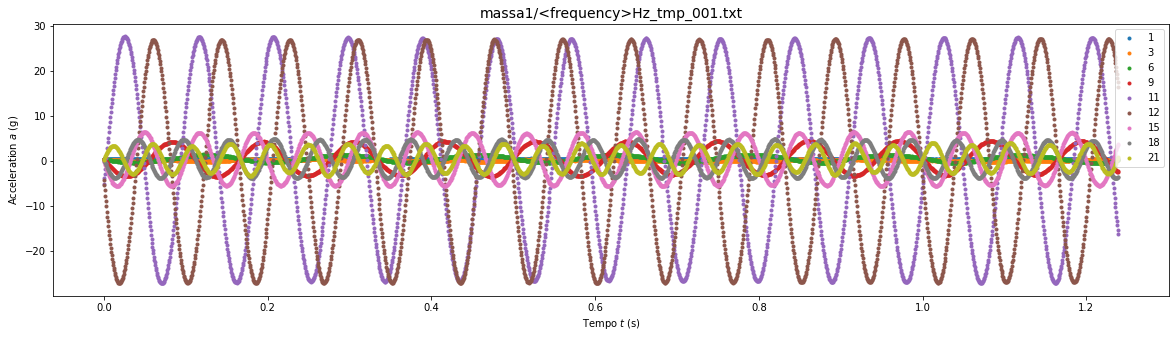

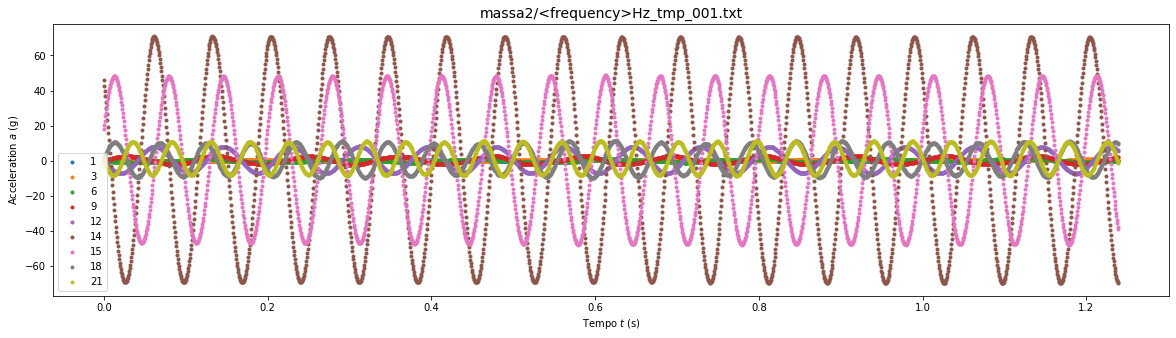

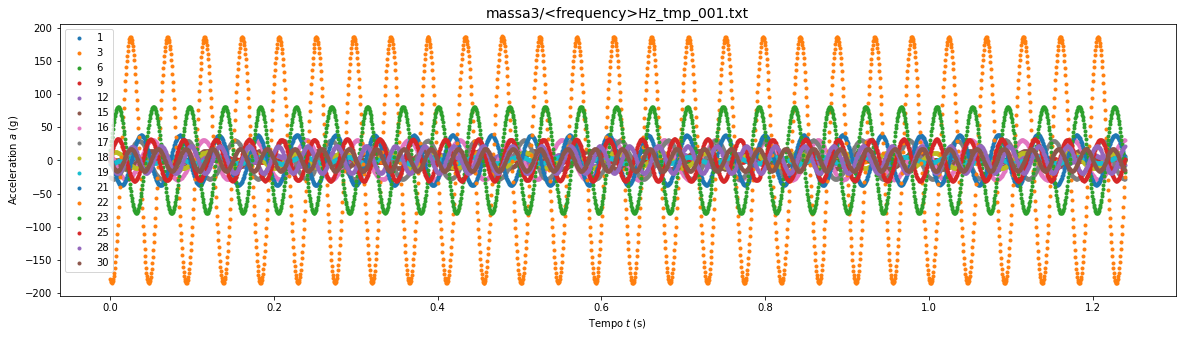

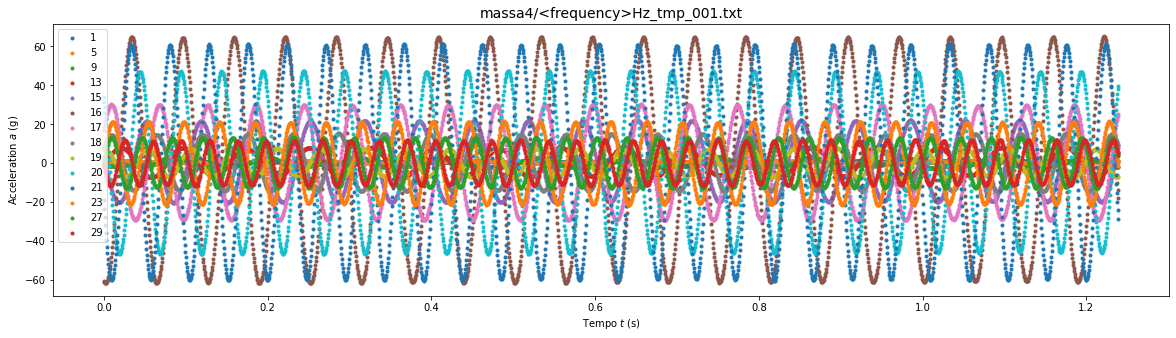

In [5]:
for folder, frequencies in folders.items():
    fig = plt.figure(figsize=(20, 5))
    axes = plt.gca()
    axes.set_title(f"{folder}<frequency>" + suffixfilename, fontsize=14)
    for frequency in frequencies:
        data = alldatavalues[folder][frequency]
        time = np.array(data[:, 0])
        acce = np.array(data[:, 1])
        axes.scatter(time, acce, marker=".", label=str(frequency))
        axes.legend()
        axes.set_xlabel(r"Tempo $t$ (s)")
        axes.set_ylabel(r"Acceleration $a$ (g)")

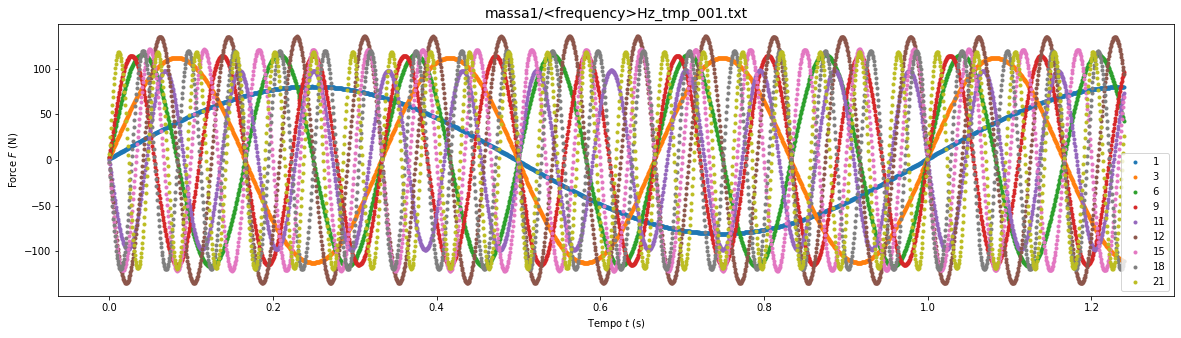

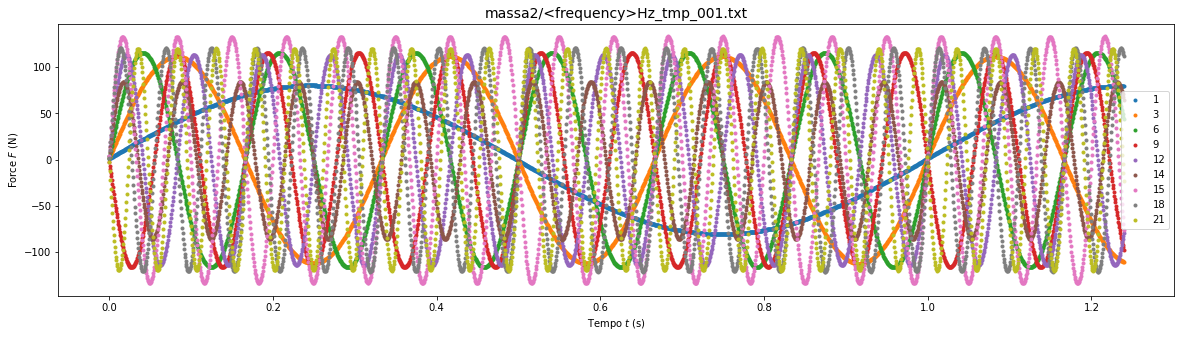

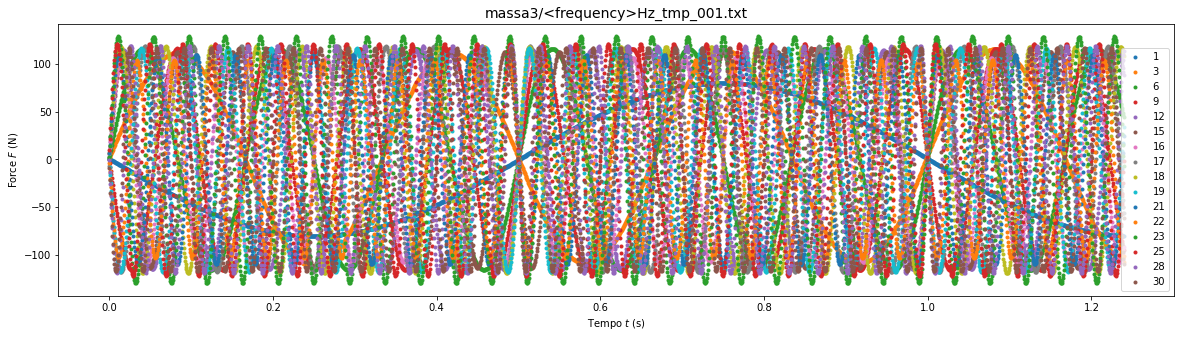

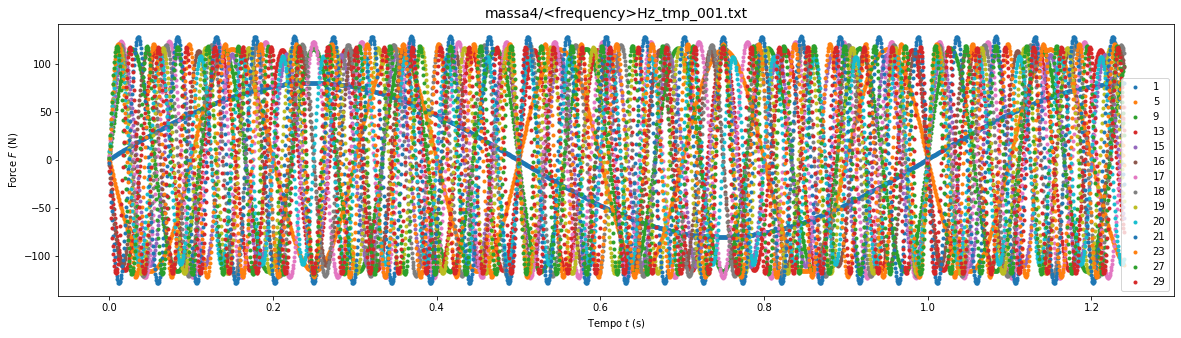

In [6]:
for folder, frequencies in folders.items():
    fig = plt.figure(figsize=(20, 5))
    axes = plt.gca()
    axes.set_title(f"{folder}<frequency>" + suffixfilename, fontsize=14)
    for frequency in frequencies:
        data = alldatavalues[folder][frequency]
        time = np.array(data[:, 0])
        forc = np.array(data[:, 2])
        axes.scatter(time, forc, marker=".", label=str(frequency))
        axes.legend()
        axes.set_xlabel(r"Tempo $t$ (s)")
        axes.set_ylabel(r"Force $F$ (N)")

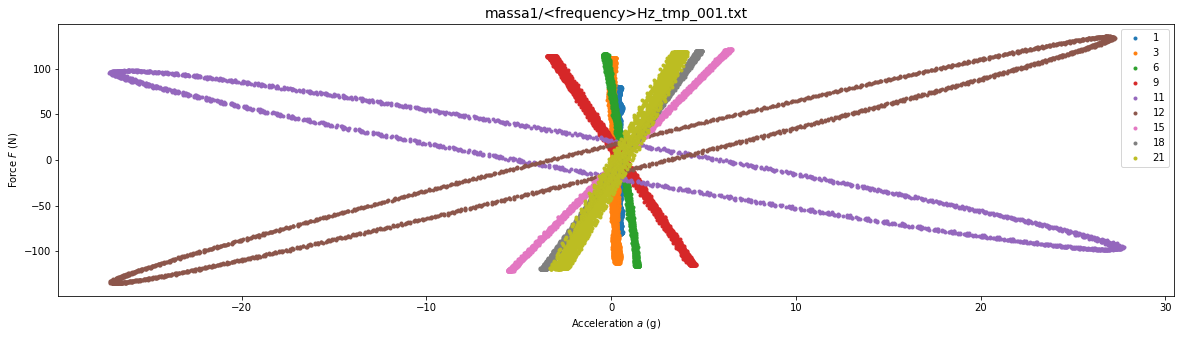

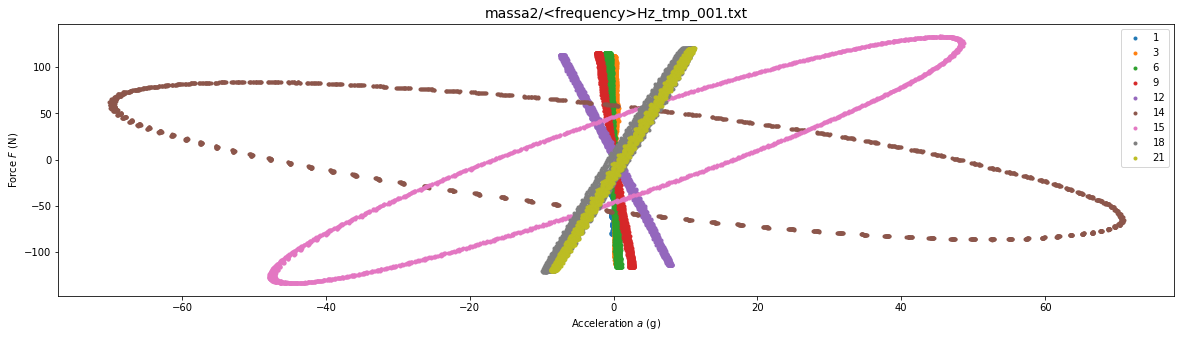

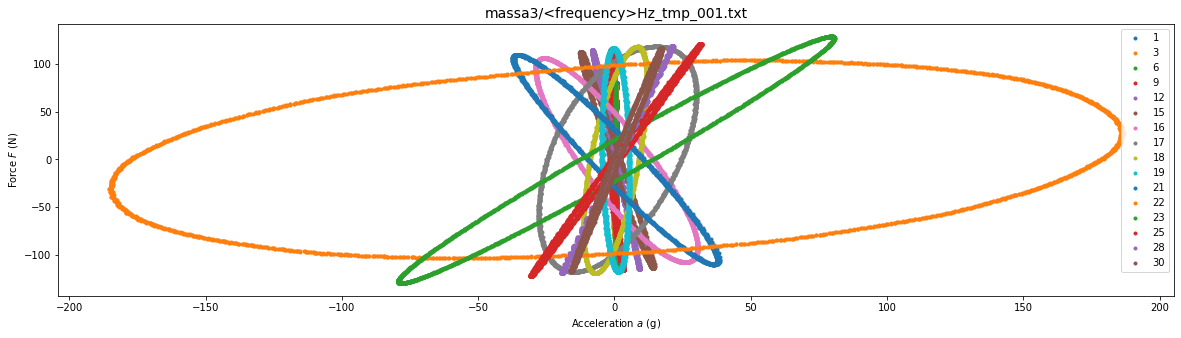

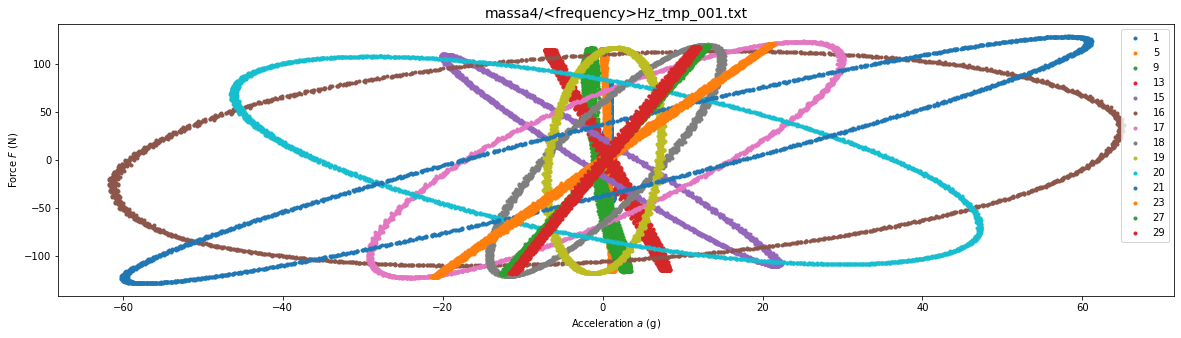

In [7]:
for folder, frequencies in folders.items():
    fig = plt.figure(figsize=(20, 5))
    axes = plt.gca()
    axes.set_title(f"{folder}<frequency>" + suffixfilename, fontsize=14)
    for frequency in frequencies:
        data = alldatavalues[folder][frequency]
        acce = np.array(data[:, 1])
        forc = np.array(data[:, 2])
        axes.scatter(acce, forc, marker=".", label=str(frequency))
        axes.legend()
        axes.set_xlabel(r"Acceleration $a$ (g)")
        axes.set_ylabel(r"Force $F$ (N)")